In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Quiz2.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print("Total number of missing values")
print(df.isna().sum())
print("Total missing values are:",df.isna().sum().sum())

Total number of missing values
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Total missing values are: 866


In [4]:
df.drop(columns=['Cabin'],axis=1,inplace=True)
df['Age']=df['Age'].fillna(df['Age'].mean())

In [5]:
print("Total number of missing values")
print(df.isna().sum())
print("Total missing values are:",df.isna().sum().sum())

Total number of missing values
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64
Total missing values are: 2


In [6]:
df.dropna(inplace=True)

In [7]:
df['AgeGroup']=pd.cut(df['Age'],bins=[0,10,20,30,40,50,60,70,80],labels=['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80'])
survival_rates=df.groupby('AgeGroup')['Survived'].mean()

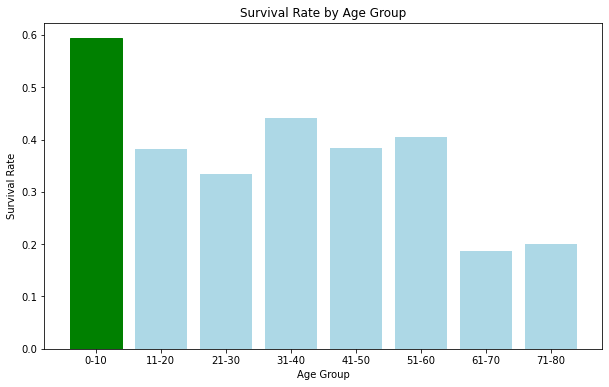

In [8]:
plt.figure(figsize=(10, 6))
bars=plt.bar(survival_rates.index,survival_rates.values,color='lightblue')
highest_survival_rate_age_group=survival_rates.idxmax()
bars[survival_rates.index.get_loc(highest_survival_rate_age_group)].set_color('green')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age Group')
plt.show()

In [9]:
survivors=df[df['Survived']==1]
class_distribution=survivors['Pclass'].value_counts()

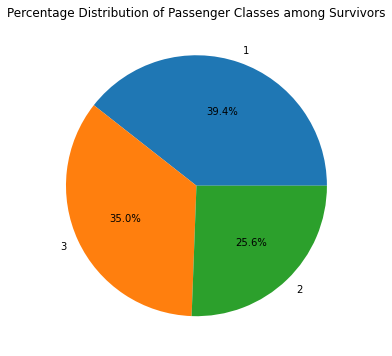

In [15]:
plt.figure(figsize=(8,6))
plt.pie(class_distribution,labels=class_distribution.index,autopct="%1.1f%%")
plt.title('Percentage Distribution of Passenger Classes among Survivors')
plt.show()

In [11]:
my_df=df.select_dtypes(exclude=[object])
correlation_matrix=my_df.corr()

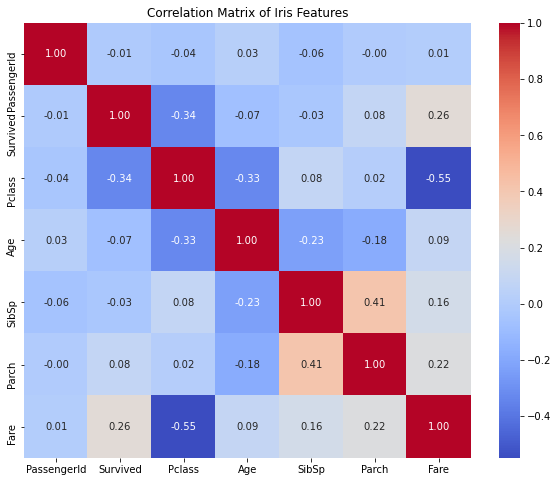

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Correlation Matrix of Iris Features')
plt.show()

In [13]:
pivot_table=df.pivot_table(values='Fare',index='Pclass',columns='Survived',aggfunc='sum')
print(pivot_table)

Survived          0           1
Pclass                         
1         5174.7206  12842.6919
2         1882.9958   1918.8459
3         5085.0035   1629.6916
